In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-odia/language-model')

In [6]:
from inltk.tokenizer import OriyaTokenizer

In [7]:
OriyaTokenizer

inltk.tokenizer.OriyaTokenizer

In [8]:
# class OriyaTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/oriya_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/oriya_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [10]:
itos[:20]

['<unk>',
 '<s>',
 '</s>',
 '▁।',
 '▁',
 ',',
 'ରେ',
 'ର',
 '▁ଓ',
 '.',
 'କୁ',
 '▁ଏହି',
 '▁ଏକ',
 '▁ସେ',
 '।',
 'ରୁ',
 '▁ଏହା',
 '▁କରିଥିଲେ',
 'ଙ୍କ',
 '▁q']

In [11]:
# 15,000 is the vocab size that we chose in sentencepiece
oriya_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=OriyaTokenizer, lang='or')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=oriya_vocab)

In [15]:
data_lm.batch_size

64

In [16]:
data_lm.save()

In [17]:
data_lm.show_batch()

idx,text
0,▁। ▁ତାଙ୍କ ▁ପୁଅ ▁ଲଳିତ ▁ମାନସିଂହ ▁ଜଣେ ▁ଭାରତୀୟ ▁ପ୍ରଶାସନିକ ▁ଅଧିକାରୀ ▁ତଥା ▁ଭାରତର ▁ପ୍ରାକ୍ତନ ▁ବୈଦେଶିକ ▁ସଚିବ ▁ଅଟନ୍ତି ▁। ▁x x b os ▁ବିବାହ ▁ହେଉଛି ▁୨୦୦୬ ▁ମସିହାରେ ▁ମୁକ୍ତିଲାଭ ▁କରିଥିବା ▁ଏକ ▁ପ୍ରେମ ▁ପ୍ରସଙ୍ଗ ▁ଯୁକ୍ତ ▁ତଥା ▁ସାମାଜିକ ▁ସଂସ୍କାର ଧର୍ମୀ ▁ହିନ୍ଦୀ ▁ଚଳଚ୍ଚିତ୍ର ▁। ▁ଚଳଚ୍ଚିତ୍ରର ▁କାହାଣୀ ର ▁ଲେଖକ ▁ତଥା ▁ଚିତ୍ରନାଟ୍ୟ ▁ନିର୍ଦ୍ଦେଶକ ▁ହେଉଛନ୍ତି ▁ସୂ ର ଜ ▁ଆର୍ ▁ବାର ଜାତ ୍ୟା ▁। ▁ଚଳଚ୍ଚିତ୍ରର ▁ମୁଖ୍ୟ ▁ଭୂମିକାରେ ▁ଅଭିନୟ ▁କରିଛନ୍ତି ▁ଅଭିନେତା ▁ଶାହିଦ ▁କପୁର ▁ଏବଂ ▁ଅଭିନେତ୍ରୀ ▁ଅମୃତା ▁ରାଓ ▁। ▁ଅମୃତା ▁ରାଓଙ୍କ ▁ସହ ▁ଶାହିଦ
1,"▁x x b os ▁ନାଶ ିକ ▁ଏକ ▁ଭାରତୀୟ ▁ପୌରପାଳିକା ▁ଅଟେ ▁। ▁ଏହା ▁ମହାରାଷ୍ଟ୍ରର ▁ନ ଶି କ୍ ▁ଜିଲ୍ଲାରେ ▁ଅବସ୍ଥିତ ▁। ▁୨୦୦୧ ▁ମସିହାର ▁ଭାରତୀୟ ▁ଜନଗଣନା ▁ଅନୁସାରେ , ▁ନାଶ ିକ ▁ସହରର ▁ମୋଟ ▁ଜନସଂଖ୍ୟା ▁୧୨ ୪୫ ୪ ▁ଅଟେ ▁। ▁ସେଥି ▁ମଧ୍ୟରୁ ▁୫୧ . ୧୮ % ▁ଜଣ ▁ପରୁଷ ▁ହୋଇଥିବା ▁ବେଳେ ▁୪୮ . ୮୨ % ▁ଜଣ ▁ନାରୀ ▁ଅଟନ୍ତି ▁। ▁ନାଶ ିକ ର ▁ସାକ୍ଷରତା ▁ହାର ▁୭୫ . ୨୪ % ▁ଅଟେ ▁। ▁ଏହା ▁ଜାତୀୟ ▁ହାର ▁ଠାରୁ ▁- ୧୦"
2,"ିଆ ମାନଙ୍କ ▁ ବିରୁଦ୍ଧରେ ▁ସେ ▁କାର୍ଯ୍ୟ ▁କରୁଥିଲେ ▁। ▁ଥରେ ▁ସେ ▁ମା ଫ ିଆ ମାନଙ୍କୁ ▁ଧରିବା ▁ପାଇଁ ▁ତୁର୍କୀ ▁ଯାଇଥିଲେ ▁। ▁ସେଠାରେ ▁ଅଜୟ , ▁ପ୍ରଶାନ୍ତ ି କୁ ▁ଭେଟି ଲା ▁। ▁ପ୍ରଶାନ୍ତ ି ▁ଅଜୟ ର ▁ଉପର ▁ଅଧିକାରୀ ଙ୍କର ▁ଝିଅ ▁ଥିଲା ▁। ▁ଅଜୟ ▁ତୁର୍କୀ ▁ଯାଇଥିବା ବେଳେ ▁ସେଠାରେ ▁ସେ ▁ନାୟକ ର ▁ଭାଇ କୁ ▁ଗିରଫ ▁କରି ▁ଭାରତ ▁ଆଣି ଦେଲା ▁। ▁ଏହାପରେ ▁ଶଙ୍କର ▁ନାରାୟଣ ▁୧୪ ▁ବର୍ଷ ▁ପରେ ▁କୋମା ରୁ ▁ବାହାରି ▁ଠିକ୍ ▁ହେଲେ ▁। ▁ତାଙ୍କୁ ▁ଏହିସବୁ ▁ପରିବର୍ତ୍ତନ ▁ବିଷୟରେ"
3,"’ ▁ଯୋଜନା ର ▁ମୂଳ ▁ଉଦ୍ଦେଶ୍ୟ ▁। ▁୨୦୧୫ ▁ମସିହାରେ ▁ନୂତନ ▁ଯା ଯା ବର ▁କୋଠା ▁ପ୍ରତିଷ୍ଠା ▁ପାଇଁ ▁୧୪ ୫ କୋଟି ▁ଟଙ୍କା ▁ଆକଳନ ▁ହୋଇଥିଲା ▁। ▁ଗୋଟିଏ ▁ପର୍ଯ୍ୟଟନ ▁ସ୍ଥଳୀ ରୁ ▁ଆଉ ▁ଏକ ▁ପର୍ଯ୍ୟଟନ ▁ସ୍ଥଳୀ ▁ବା ▁ଦୂର - ଦୁ ର ାନ୍ତ ରେ ▁ଥିବା ▁ପର୍ଯ୍ୟଟନ ▁ସ୍ଥଳୀ ▁ଗୁଡ଼ିକ ରେ ▁ପହଞ୍ଚିବା ▁ବାଟରେ ▁ଚା , ପାନ , ମ ୃ ଦୁ ▁ପାନୀୟ ▁ଓ ▁ଖାଦ୍ୟ ▁ତଥା ▁ସାମୟିକ ▁ବିଶ୍ରାମ ର ▁ସୁବିଧା ▁ପାଇଁ ▁‘ ଯା ଯା ବର ’ ▁ବ୍ରାଣ୍ଡ ରେ ▁୩୩ ଟି ▁ପାନ୍ଥ"
4,"▁ଫେରିବା କୁ ▁ହିଁ ▁ପଡି ଲା ▁| ▁ମାସ େ ▁ପରେ ▁ହିଁ ▁ଅଗ ୍ୟା ଁ ତ ▁ରୋଗରେ ▁ତାଙ୍କ ▁ପିତାଙ୍କ ▁ମୃତ୍ୟୁ ▁ଘଟିଲା ▁| ▁ସେହି ▁ବର୍ଷ ▁ସେ ▁ନିଜ ▁ପୂର୍ବ ▁ବିଦ୍ୟାଳୟରେ ▁କିଛି ▁ସମୟ ▁ଅଧ୍ୟାପନା ▁କରିଥିଲେ ▁| ▁ତେ ▁୧୮୮୦ ରେ ▁ତାଙ୍କ ▁ଦୁଇ ▁ଜଣ ▁ମାମୁଁ ଙ୍କ ▁ବଦାନ୍ୟ ତା ରୁ ▁ସେ ▁ଉଚ୍ଚ ▁ଶିକ୍ଷା ▁ଲାଗି ▁ପ୍ରା ଗ୍ ▁ଗଲେ , ▁କିନ୍ତୁ ▁ଦୁର୍ଭାଗ୍ୟ ବଶତଃ ▁ସେ ▁ପହଞ୍ଚିବା ▁ବେଳେ ▁ନାଁ ଲେଖା ର ▁ସମୟ ▁ସରି ଯାଇଥିଲା ▁| ▁ସେ ▁ମଧ୍ୟ ▁ଦୁଇ ▁ଜରୁରୀ ▁ବିଷୟ ▁ଗ୍ରୀକ୍ ▁ଭାଷା"


In [18]:
len(data_lm.vocab.itos)

15000

In [19]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [20]:
gc.collect()

20

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


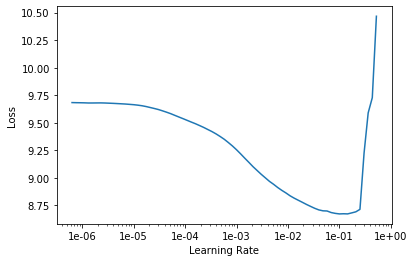

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(20, 1e-3, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,6.618229,6.520764,0.153913,05:40
1,5.773976,5.705898,0.198334,05:43
2,5.343286,5.315041,0.224747,05:43
3,5.000231,5.020288,0.239873,05:43
4,4.754064,4.773448,0.258383,05:43
5,4.603960,4.565800,0.274974,05:42
6,4.368167,4.390756,0.295228,05:43
7,4.190627,4.236928,0.312387,05:42
8,4.056720,4.076877,0.332570,05:42
9,3.767288,3.957505,0.348424,05:42


Better model found at epoch 0 with accuracy value: 0.15391284227371216.
Better model found at epoch 1 with accuracy value: 0.19833433628082275.
Better model found at epoch 2 with accuracy value: 0.22474715113639832.
Better model found at epoch 3 with accuracy value: 0.23987296223640442.
Better model found at epoch 4 with accuracy value: 0.2583828270435333.
Better model found at epoch 5 with accuracy value: 0.274973601102829.
Better model found at epoch 6 with accuracy value: 0.2952282428741455.
Better model found at epoch 7 with accuracy value: 0.3123874068260193.
Better model found at epoch 8 with accuracy value: 0.33256977796554565.
Better model found at epoch 9 with accuracy value: 0.3484242260456085.
Better model found at epoch 10 with accuracy value: 0.36532264947891235.
Better model found at epoch 11 with accuracy value: 0.3836473822593689.
Better model found at epoch 12 with accuracy value: 0.4005688726902008.
Better model found at epoch 13 with accuracy value: 0.416713446378707

In [25]:
TEXT = "ଚଳାଚଳ ପାଇଁ"
N_WORDS = 40
N_SENTENCES = 2

In [26]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.5) for _ in range(N_SENTENCES)))

ଚଳାଚଳ ପାଇଁ ▁ଏକ ▁ଭାରତୀୟ ▁ଭାରତୀୟ ▁ପୌରପାଳିକା ▁ଅଟେ ▁। ▁ଏହା ▁ମହାରାଷ୍ଟ୍ରର ▁ପୁନେ ▁ଜିଲ୍ଲାରେ ▁ଅବସ୍ଥିତ ▁। ▁ଚଳାଚଳ ର ▁ସୁବିଧା ▁ନିମନ୍ତେ ▁ଭାରତୀୟ ▁ବୈଦେଶିକ ▁ସେବା ରୁ ▁ଦୂରେଇ ▁ରହିବା କୁ ▁ହୁଏ ▁। ▁ଏହି ▁ବିଷୟ ▁ଭାରତୀୟ ▁ବାୟୁସେନା ର ▁ଏକ ▁ ସାମୁଦ୍ରିକ ▁ଉପକରଣ ▁। ▁ଏହା ▁ଭାରତୀୟ ▁ବାୟୁସେନା ର ▁ଏକ
ଚଳାଚଳ ପାଇଁ ▁ବ୍ୟବହାର ▁ହେଉଥିବା ▁ଏକ ▁ପ୍ରକାର ▁ଜଳ ଦ୍ୱାରା ▁ସୃଷ୍ଟି ▁ହୁଏ ▁। ▁ଏହାକୁ ▁ଏକ ▁ସାଧାରଣ ▁ଜଳ ଜ ▁ଜଳ ▁ବୋଲି ▁କୁହାଯାଏ ▁। ▁ଏଥିରେ ▁ବାୟୁ ର ▁ଜଳ ▁ଓ ▁ବାୟୁ ର ▁ପରିମାଣ ▁ମଧ୍ୟ ▁ଅଧିକ ▁ହୋଇଥାଏ ▁। ▁ଏହା ▁ଭାରତର ▁ଏକ ▁ପ୍ରମୁଖ ▁ଜଳ ଜ ▁ଜଳ ▁ଜଳ ▁। ▁ଭାରତୀୟ


In [27]:
np.exp(3.289095)

26.818581853462867

In [28]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [29]:
# Generating embedding vectors for visualization

In [30]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-odia/language-model')

In [12]:
# defaults.device = torch.device('cpu')

In [14]:
# learn = load_learner(path / 'OriyaDataset/')

In [31]:
encoder = get_model(learn.model)[0]

In [32]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([15000, 410])

In [33]:
embeddings = encoder.state_dict()['encoder.weight']

In [34]:
embeddings = np.array(embeddings)

In [35]:
embeddings[0].shape

(410,)

In [36]:
df = pd.DataFrame(embeddings)

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,-0.276469,0.148103,0.076447,0.197581,-0.164103,0.098220,-0.005452,0.413507,-0.083298,-0.017344,...,0.142507,-0.036731,-0.018054,0.011517,0.290613,-0.095372,-0.042910,-0.382316,-0.259149,-0.210937
1,0.011258,0.012085,-0.327177,-0.190794,0.199453,0.301151,0.210630,-0.192504,-0.297708,-0.332622,...,0.242023,0.041203,-0.310166,0.014573,0.181239,-0.040165,0.270503,0.191801,0.654827,-0.096098
2,0.016205,0.004489,-0.327294,-0.196442,0.195931,0.308338,0.220065,-0.201470,-0.301388,-0.321262,...,0.243367,0.050428,-0.316167,0.014523,0.200516,-0.035334,0.274699,0.203035,0.642391,-0.092943
3,-0.146666,0.353064,-0.371455,0.269509,-0.354880,0.030576,-0.080598,0.134785,0.034050,-0.195382,...,0.264589,0.074738,0.232390,-0.135569,-0.270693,0.190017,-0.265999,-0.238789,-0.308828,0.125515
4,-0.019545,-0.194475,0.320650,0.237257,-0.087813,-0.182603,-0.150361,0.095819,0.096298,0.210913,...,0.033817,0.044765,-0.090454,-0.093920,-0.238041,-0.024250,0.000492,-0.168707,-0.036155,0.149730


In [38]:
df.shape

(15000, 410)

In [39]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [40]:
df2 = pd.DataFrame(itos)

In [41]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁।
4,▁


In [42]:
df2.shape

(15000, 1)

In [43]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [44]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 1.1258e-02,  1.2085e-02, -3.2718e-01, -1.9079e-01,  1.9945e-01,
         3.0115e-01,  2.1063e-01, -1.9250e-01, -2.9771e-01, -3.3262e-01,
         1.4946e-01,  3.2503e-01, -1.3289e-01, -8.2823e-02, -1.4475e-02,
        -6.5161e-02, -1.8936e-01,  5.7732e-02, -7.9284e-02,  3.7859e-01,
         1.6833e-01, -3.4021e-01,  1.8050e-01,  1.4352e-01,  3.3528e-01,
         1.7950e-01,  1.9520e-01,  1.9014e-02,  2.5873e-01,  1.5333e-01,
         2.0829e-01,  4.2714e-01, -3.3553e-01,  1.9896e-01, -2.9581e-01,
         1.4861e-01,  1.2213e-01,  4.3766e-01, -1.0096e-01, -1.7052e-01,
         2.6325e-01, -2.3996e-01,  5.3649e-02,  2.2249e-01, -3.1474e-01,
         1.6868e-01,  3.4314e-02, -3.2171e-01, -3.4150e-02,  3.8736e-01,
         3.1514e-01,  2.0272e-01,  2.9503e-01,  7.5956e-02,  9.8827e-03,
        -6.1945e-03,  5.0792e-01,  2.0156e-02,  2.0680e-01, -4.6851e-01,
         1.1200e-01, -1.7487e-01,  5.2594e-02, -2.0620e-01, -3.2792e-02,
         4.1515e-01, -7.0323e-02, -2.9746e-01, -1.0